In [4]:
def multiply(A,B):
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j]
    return ans

In [5]:
def multiply(A,B):
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j]
    return ans

def convolution(image,kernel):
    tempImg = np.zeros(shape=image.shape)
    count = int(kernel.shape[0]/2)
    for c in range(count):
        image = np.concatenate((np.zeros((image.shape[0],1), dtype=int), image), axis=1)
        image = np.concatenate((np.zeros((1,image.shape[1]), dtype=int), image), axis=0)
        image = np.append(image, np.zeros((1,image.shape[1]), dtype=int), axis=0)
        image = np.append(image, np.zeros((image.shape[0],1), dtype=int), axis=1)
    x,y = 0,0
    for i in range(0 + count,image.shape[0] - count):
        for j in range(0 + count, image.shape[1] - count):
            A = image[i-1:i+2,j-1:j+2]
            tempImg[x,y] = multiply(A,kernel)
            y = y + 1
        x = x + 1
        y = 0
    return tempImg

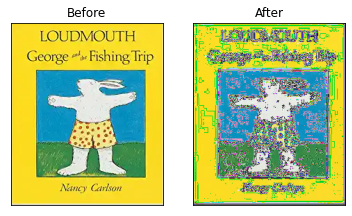

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
image = cv.imread('book.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(image)
plt.title('Before')
plt.xticks([])
plt.yticks([])
#kernel = 1/9*np.array(([1,1,1],[1,1,1],[1,1,1]))
#kernel = np.array(([0,0,0],[0,1,0],[0,0,0]))
#kernel = np.ones((3, 3),np.float32)/25
#kernel = np.ones((10, 10),np.float32)/100
kernel = np.array([[0, -1,  0], [-1,  5, -1],[0, -1,  0]])
result = image.copy()
red_channel = convolution(image[:,:,0],kernel)
green_channel = convolution(image[:,:,1],kernel)
blue_channel = convolution(image[:,:,2],kernel)
result[:,:,0] = red_channel
result[:,:,1] = green_channel
result[:,:,2] = blue_channel
cv.imwrite('result.png', cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(result)
plt.title('After')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
image = np.array(([2,4,6],[8,10,12],[14,16,18]))
kernel = np.array(([4,8,4,6,45],[6,5,4,3,2],[3,2,1,0,0]))
convol = convolution(image,kernel)
print(convol)
convol.max()

[[ 52. 112. 108.]
 [156. 302. 268.]
 [238. 396. 322.]]


396.0